In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import time
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
plt.style.use('dark_background')


In [3]:
ball = lambda d, n=500: [np.random.multivariate_normal(np.zeros(d),np.identity(d)) for _ in range(n)]

In [8]:
def cube(d,n=500):
    b = ball(d,n=n)
    s = np.array([x/np.linalg.norm(x,ord=np.inf) for x in b])
    return s

In [9]:
def sphere(d,n=500):
    b = ball(d,n=n)
    s = np.array([x/np.linalg.norm(x) for x in b])
    return s
    

In [10]:
def diamond(d,n=500):
    b = ball(d,n=n)
    s = np.array([x/np.linalg.norm(x,ord=1) for x in b])
    return s

In [21]:
def lp_ball(d,p,n=500):
    b = ball(d,n=n)
    s = np.array([x/np.linalg.norm(x,ord=p) for x in b])
    return s

In [11]:
def a_shape(n):
    dim = 2
    shapes = list()
    scale = 1
    for k in range(n):
        s = sphere(dim)*np.sqrt(2)*scale
        b = cube(dim)*scale
        dia = diamond(dim)*scale
        scale = scale*np.sqrt(2)
        shapes.extend([s,b,dia])
    return np.concatenate(shapes)

def squig_shape(n):
    squig = lambda x: x*(1+.05*np.sin(20*np.arctan(x[1]/x[0])))
    
    dim = 2
    shapes = list()
    scale = 1
    for k in range(n):
        s = sphere(dim)*np.sqrt(2)*scale
        b = cube(dim)*scale
        dia = diamond(dim)*scale
        scale = scale*np.sqrt(2)
        shapes.extend([s,b,dia])
    D = np.concatenate(shapes)
    return np.stack([squig(v) for v in D])

In [12]:
D = a_shape(5)

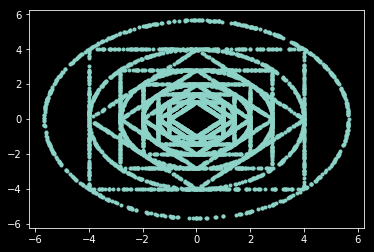

In [13]:
a1,a2 = 0,1
plt.plot(D[:,a1],D[:,a2],'.')
plt.show()

In [17]:
pca = PCA(n_components=2)
D_h = pca.fit_transform(D)

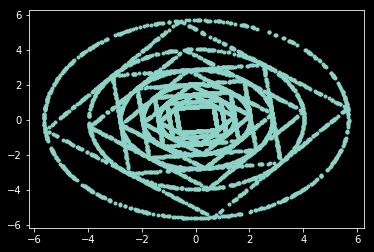

In [18]:
plt.plot(D_h[:,0],D_h[:,1],'.')
plt.show()

In [20]:
np.random.rand(3,1)

array([[0.02503433],
       [0.95327711],
       [0.86873702]])

In [97]:
def normalize(x,ord=2):
    return x/np.linalg.norm(x,ord=ord)

def random_color():
    color = np.random.rand(3)    
    return color

def blueify_color():
    c = random_color()
    m = max(c)
    mat = np.array([
        [3,0,0],
        [0,1,0],
        [0,.3,.3]
    ])
    v = mat.dot(c)
    
    return v*(m/max(v))

# def blueify_color():
#     c = random_color()
#     m = max(c)
#     mat = np.array([
#         [.2,0,0],
#         [0,1,0],
#         [0,0,5]
#     ])
#     v = mat.dot(c)
    
#     return v*(m/max(v))

In [38]:
random_color()

[42, 174, 206]

In [52]:
def rot_mat(theta):
    return np.array(
        [[np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]]
    )

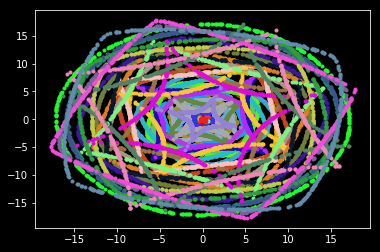

In [64]:
n_shapes = 50
d = 2
upp = 10

D_r = list()
scale = 10
for _ in range(n_shapes):
    
    p = np.random.uniform(.01,2)
    
    shape = lp_ball(d,p)*np.log(scale)
    
    theta = np.random.uniform(0,2*np.pi)
    rmat = rot_mat(theta)
    
    shape = shape.dot(rmat)
    
    color = np.random.rand(3)
    plt.plot(shape[:,0],shape[:,1], '.', c=color)
    scale = scale*np.sqrt(2)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


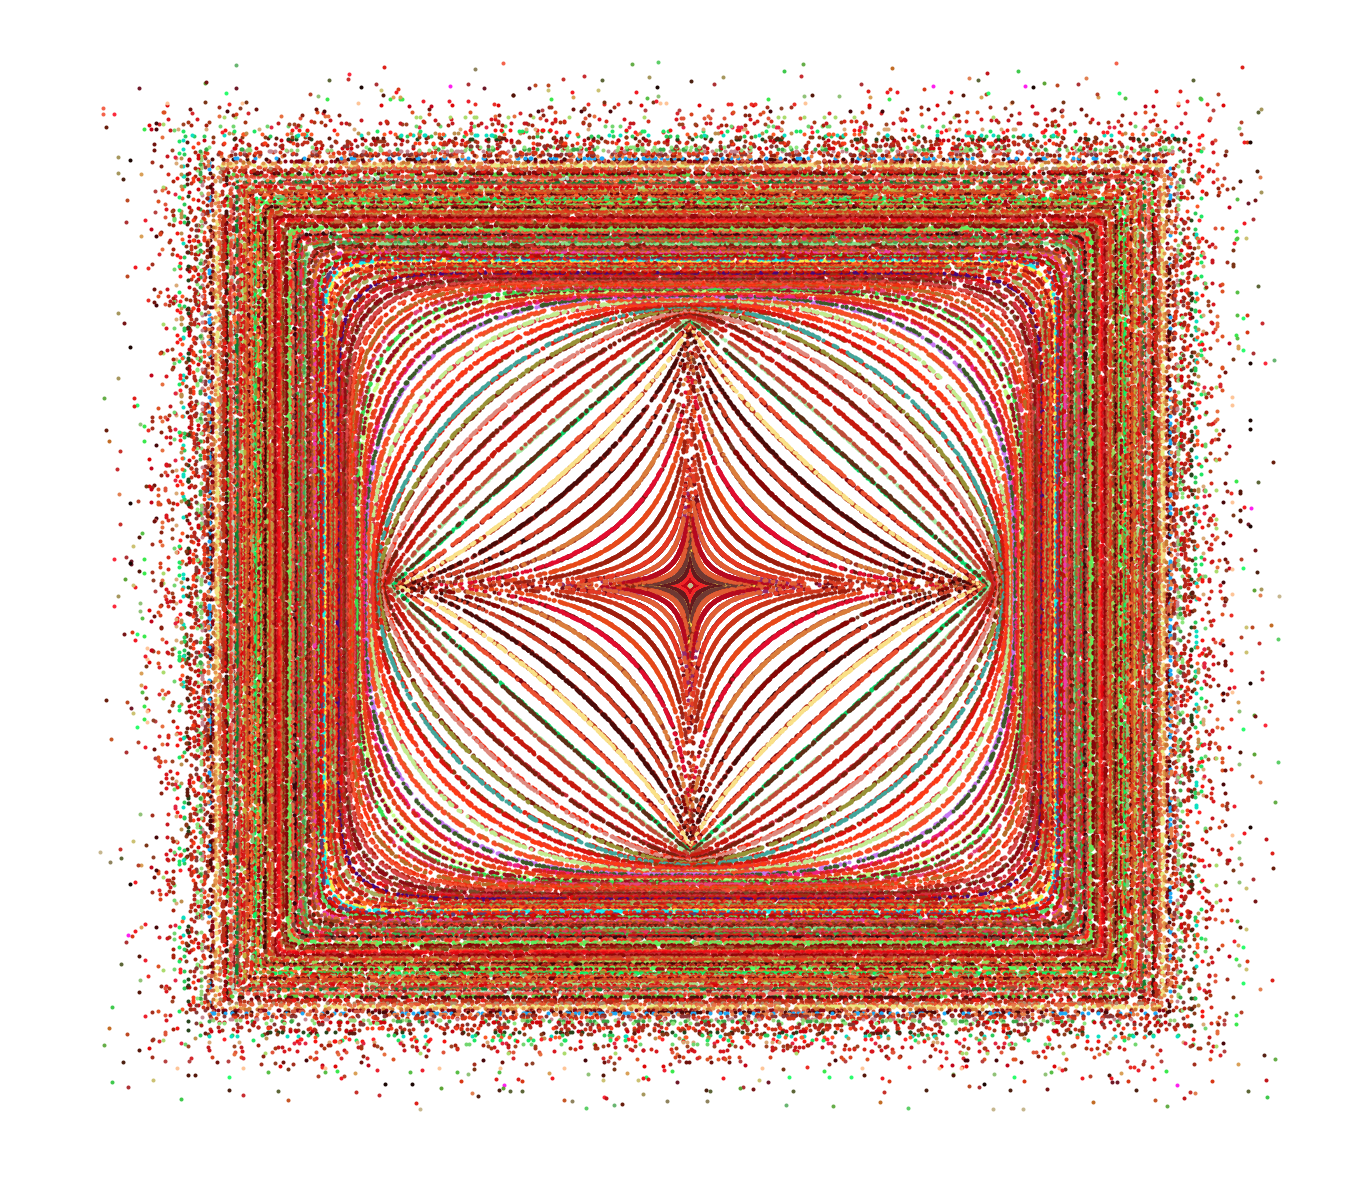

In [106]:
n_shapes = 500
d = 2
upp = 10

D_r = list()
scale = 10
fig=plt.figure(figsize=(18, 16),frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
for k in range(n_shapes):
    
    p = (np.exp((k - n_shapes/2)/2))**(.1)
    
#     shape = lp_ball(d,p,n=int(1000/(k+1)))*np.log(scale)
    shape = lp_ball(d,p,n=1000)*np.log(scale)
    
    color = blueify_color()
    ax.plot(shape[:,0],shape[:,1], '.', c=color)
    scale = scale*np.sqrt(2)
ax.axis('off')
plt.show()

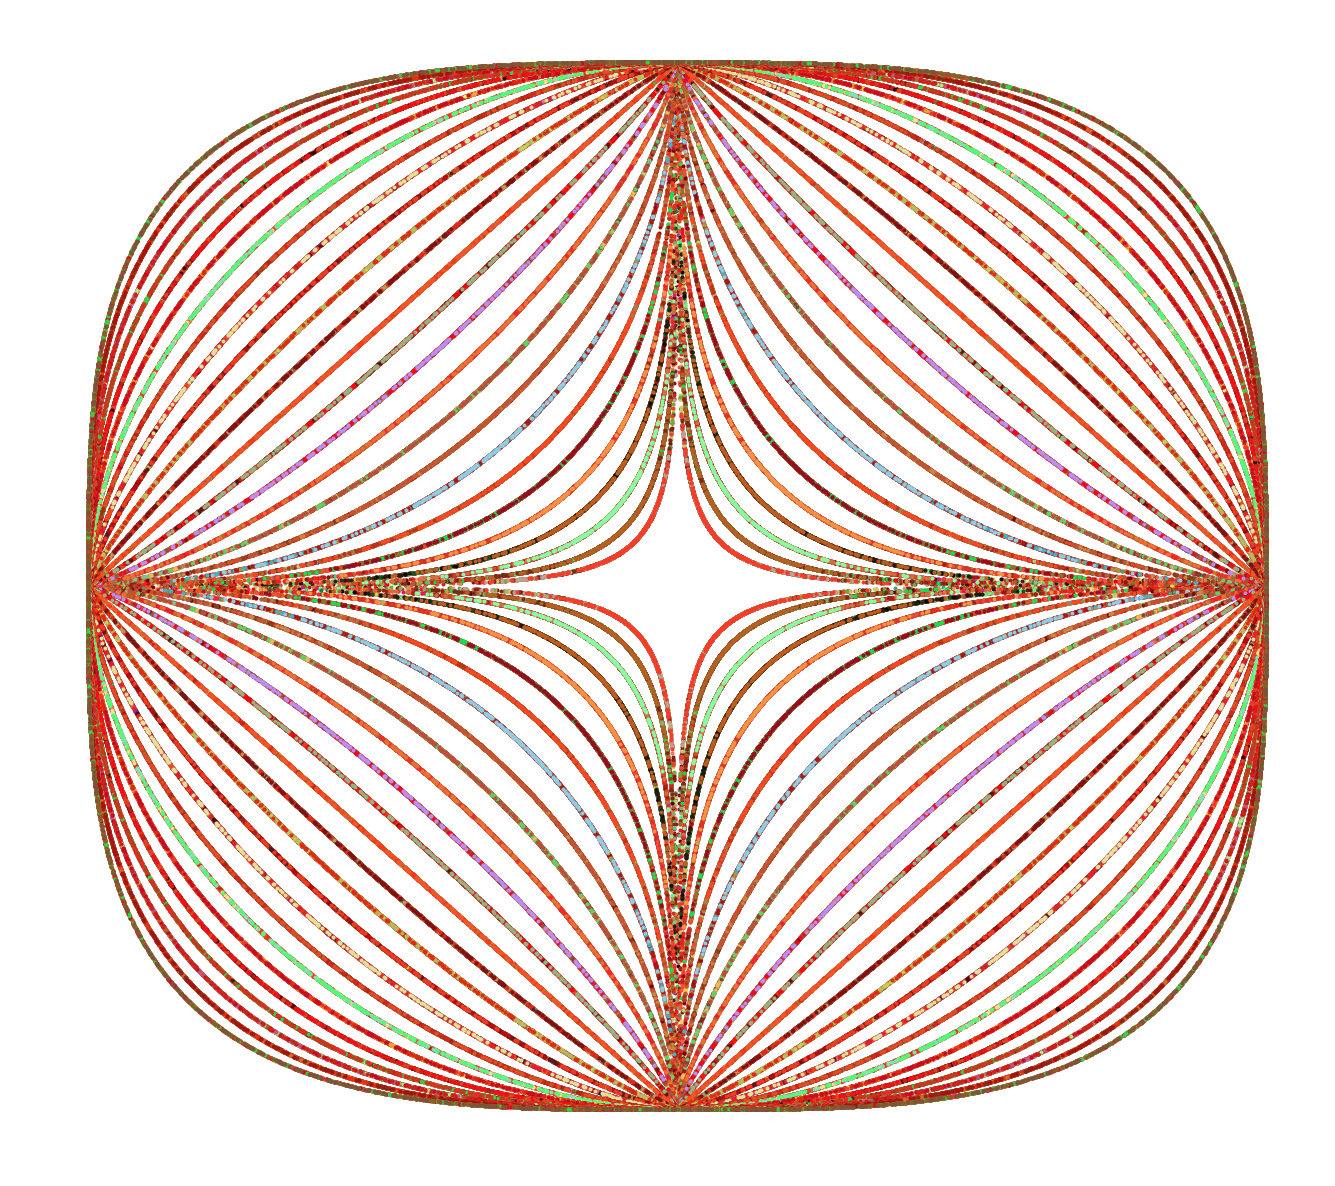

In [112]:
n_shapes = 500
d = 2
upp = 10

D_r = list()
scale = 10
fig=plt.figure(figsize=(18, 16),frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
for k in range(n_shapes):
    
    p = (np.exp((k - n_shapes/2)/20))**(.1)
    
#     shape = lp_ball(d,p,n=int(1000/(k+1)))*np.log(scale)
    shape = lp_ball(d,p,n=1000)*np.log(scale)
    
    color = blueify_color()
    ax.plot(shape[:,0],shape[:,1], '.', c=color)
#     scale = scale*np.sqrt(2)
ax.axis('off')
plt.show()